<a href="https://colab.research.google.com/github/sky16k/fps-3/blob/main/%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D1%81%D1%82%D0%B0%D1%82_%D0%B8%D1%82%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Итоговое задание «Путь аналитика»

##Задание

Вопросы по заданию
Преподаватель: Арсений Сова

Цель задания:
Собрать все полученные знания воедино. Исследовать данные, проверить гипотезу и сделать выводы.

Описание задания:
Поздравляем! Вы успешно прошли стажировку, помогли коллегам с исследованием и определили фактор влияющий на стратегию компании. Вас взяли в одно из подразделений группы компаний, Вы - Аналитик крупного агрегатора такси. Теперь перед Вами стоит важная задача: самостоятельно провести исследование данных, проверить гипотезу о поведенческом предпочтении пользователей к определённому классу такси и сделать выводы, чтобы помочь компании стать лучшей на рынке… Успехов!

Используем датасет FPS_hw_x_df_x_taxi.xlsx.
Исследуем данные и строим графики плотности распределения дистанций поездок для классов “Economy” и “Comfort”.
Проверяем гипотезу: “На дальние поездки, пользователи предпочитают Economy-классу более комфортные условия поездки - Comfort-класс”.
Делаем выводы по результатам проверки.
Результат ДЗ предоставить в виде: ссылки на документ / файла.

Выполняем в любом из инструментов - google-таблицы / google colaboratory (python) / excel.

Убедитесь, что к google-таблице / ноутбуку предоставлен доступ по ссылке, иначе преподаватель не сможет проверить работу. Для этого можно открыть браузер в режиме инкогнито и убедиться, что ссылки открываются корректно.

Как запустить chrome в режиме инкогнито

Как запустить Safari в режиме инкогнито

Критерии оценки задания:
- Вычислена описательная статистика.
- Построено распределение задействованных в гипотезе данных.
- Проведена проверка гипотезы соответствующим статистическим критерием.
- Сделаны выводы по результатам проверки.

Описание датасета:

Датасет содержит информацию о поездках на такси одного из известных агрегаторов.
- order_gk – Идентификатор поездки
- weekday_key – День недели совершения поездки
- hour_key – Час совершения поездки
- distance_km – Дистанция поездки
- offer_class_group – Класс поездки (Economy; Comfort; Premium; Delivery)
- driver_response – Статус поездки (1 – поездка совершена; 0 – отмена)
'''

'''

'''

# Подключение библиотек

In [1]:
import copy
import pandas as pd
import seaborn as sns   #работа с красивыми графиками
import matplotlib.pyplot as plt   #работа с графиками

# Загрузка и просмотр данных

In [2]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')#,index_col='date') #импорт с указанным индексом
df.head()
#len(df)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [3]:
#plt.hist(df['distance_km'],50)

In [4]:
#df.value_counts()

#Предварительная обработка данных

In [5]:
#отобрать только состоявшиеся поездки 
#судя по обсуждению на странице задания, не стоило это делать
#df1 = df[df['driver_response'] != 0]
#df1

In [6]:
#df1.value_counts('driver_response')

In [7]:
#отобрать поездки класса "Комфорт"
df_c = df[df['offer_class_group'] == 'Comfort']
print(df_c['distance_km'].describe())
#df_c

count    500.000000
mean      29.758910
std       17.644643
min        0.024259
25%       16.345205
50%       28.078273
75%       41.300650
max       81.507022
Name: distance_km, dtype: float64


In [8]:
#отобрать поездки класса "Эконом"
df_e = df[df['offer_class_group'] == 'Economy']
print(df_e['distance_km'].describe())
#df_e

count    500.000000
mean      26.283117
std       17.016153
min        0.089947
25%       13.372229
50%       23.798183
75%       36.845287
max       90.516618
Name: distance_km, dtype: float64


In [9]:
df_comp = df[df['offer_class_group'].isin(('Economy', 'Comfort'))]
#df_comp

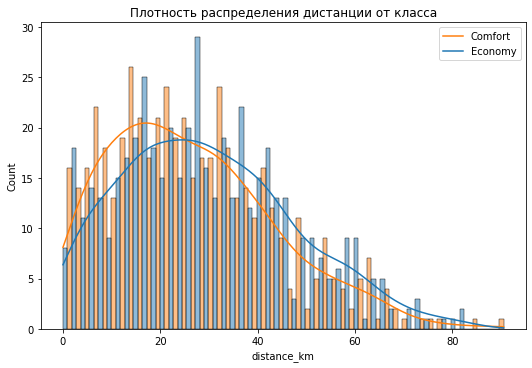

In [10]:

sns.displot(x='distance_km', #разложить по значению в колонке 'Weight' 
            data=df_comp,    #взять данные из df
            kde=True,   #добавить линию ядерной оценки плотности 
            hue='offer_class_group', #разделить и раскрасить по значению в колонке 'Gender'
            bins=50,    #разделить гистограмму на 90 'корзин'
            aspect=1.5, #вытянуть ширину в 1.5 раза от высоты
            multiple='dodge', #расположить столбцы разных множеств рядом
            legend = False, #убрать легенду
            facet_kws={ #параметры сетки графиков
              'despine':False  #вернуть рамки графиков в сетке
              }) #
plt.title('Плотность распределения дистанции от класса') #название всей области графиков
plt.legend(['Comfort', 'Economy']) #подписи данных на графиках
plt.show()



In [11]:
'''
sns.distplot(df_c['distance_km'],50)
sns.distplot(df_e['distance_km'],50)
plt.title('Плотность распределения веса от пола')
#plt.legend(['Male', 'Female'])
plt.show()
'''

"\nsns.distplot(df_c['distance_km'],50)\nsns.distplot(df_e['distance_km'],50)\nplt.title('Плотность распределения веса от пола')\n#plt.legend(['Male', 'Female'])\nplt.show()\n"

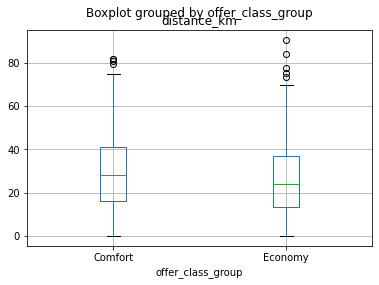

In [12]:
df_comp.boxplot(column='distance_km',by='offer_class_group')

Распределение плотности двух сравниваемых величин является близким к нормальному, а наборы данных для них одинаковой длины. Поэтому применим к ним методы Т-критерия Стьюдента и U-критерия Манна-Уитни.

##Гипотеза
- H0 - Средняя дистанция поездок класса "Комфорт" не больше средней дистанции поездок класса "Эконом".
- HA - Средняя дистанция поездок класса "Комфорт" больше средней дистанции поездок класса "Эконом".

In [13]:
from scipy.stats import ttest_ind   #библиотека Т-теста - t-критерий Стьюдента
from scipy.stats import mannwhitneyu    #библиотека теста Манна-Уитни

alpha = 0.05                          # Уровень значимости

###Проведение Т-Теста (t-критерий Стьюдента)

In [16]:
result = ttest_ind(df_c['distance_km'], df_e['distance_km'], alternative='greater')
print('p-value: %.5f' % result.pvalue)    #до 8 знака после запятой

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00078
Отвергаем нулевую гипотезу


Дистанция поездок класса "Комфорт" статистически значимо больше дистанции поездок класса "Эконом".

###Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [17]:
result = mannwhitneyu(df_c['distance_km'], df_e['distance_km'], alternative='greater')
print('p-value: %.5f' % result.pvalue)    #до 8 знака после запятой

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00064
Отвергаем нулевую гипотезу


Средняя дистанция поездок класса "Комфорт" статистически значимо больше средней дистанции поездок класса "Эконом".

#Вывод

Проведя предварительную обработку данных и отобрав только заказы в классах "Комфорт" и "Эконом" получили два набора данных для исследования.

Нашли основные статистические параметры распределения и визуализировали их для предварительного анализа. На его основе выбрали методы проверки заданной гипотезы.

Для класса "Комфорт":
- count =   243.000000
- mean  =   29.931387
- std   =  17.881000
- min   =  0.291967
- 25%   =    16.409954
- 50%   =    28.673373
- 75%   =    42.388276
- max   =    81.507022

Для класса "Эконом":
- count =   211.000000
- mean  =    25.338592
- std   =    15.787966
- min   =     0.098457
- 25%   =    12.377581
- 50%   =    23.335783
- 75%   =    36.048700
- max   =    66.617846

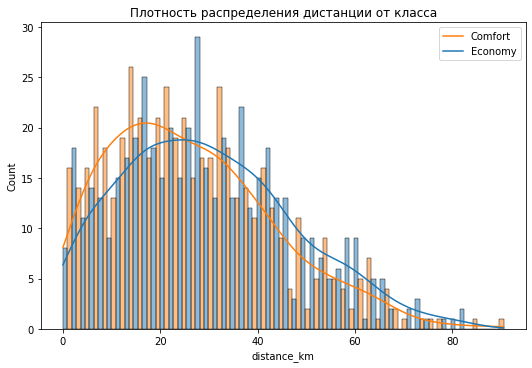

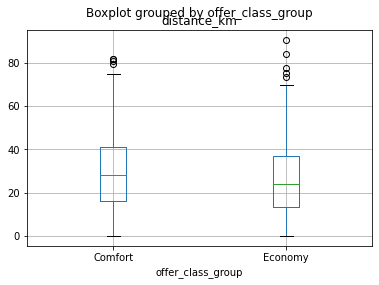

Проведя статистический анализ, уверенно  подтвердили гипотезу о превышении дистанции поездок класса "Комфорт" над классом "Эконом" 2 методами (Стьюдента и Манна-Уитни)